**Name:** David Andrejsin  
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)  
**Assignment:** Lab 6: Association Rule Mining with Apriori and FP-Growth

In [ ]:
# Step 1: Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [8]:
from google.colab import files
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail (1).xlsx


In [10]:
# Step 2: Load the Dataset
# The dataset is in Excel format (.xlsx). Adjust path if needed.
df = pd.read_excel("Online Retail.xlsx")

# Preview the data
display(df.head())

print(df.isnull().sum())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [11]:
# Step 3: Data Cleaning
# Remove missing Customer IDs
df.dropna(subset=['CustomerID'], inplace=True)

# Remove cancelled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove rows with non-positive quantities
df = df[df['Quantity'] > 0]

# Remove rows with empty or missing Description
df = df[df['Description'].notna()]
df['Description'] = df['Description'].str.strip()

df.shape


(397924, 8)

In [12]:
# Step 4: Create Transactions (Itemsets)
# Group products by InvoiceNo
baskets = df.groupby('InvoiceNo')['Description'].apply(list).tolist()

# Optional: remove duplicates inside baskets
baskets = [list(set(basket)) for basket in baskets]

# Preview
baskets[:5]


[['WHITE METAL LANTERN',
  'SET 7 BABUSHKA NESTING BOXES',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'GLASS STAR FROSTED T-LIGHT HOLDER',
  'WHITE HANGING HEART T-LIGHT HOLDER'],
 ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK'],
 ["POPPY'S PLAYHOUSE KITCHEN",
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'IVORY KNITTED MUG COSY',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  "POPPY'S PLAYHOUSE BEDROOM",
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'DOORMAT NEW ENGLAND',
  'BOX OF VINTAGE JIGSAW BLOCKS',
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'ASSORTED COLOUR BIRD ORNAMENT'],
 ['YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD']]

In [13]:
# Step 5: One-Hot Encode for Market Basket Analysis
te = TransactionEncoder()
te_array = te.fit(baskets).transform(baskets)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

df_encoded.head()


,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


/tmp/ipython-input-14-1065334888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")


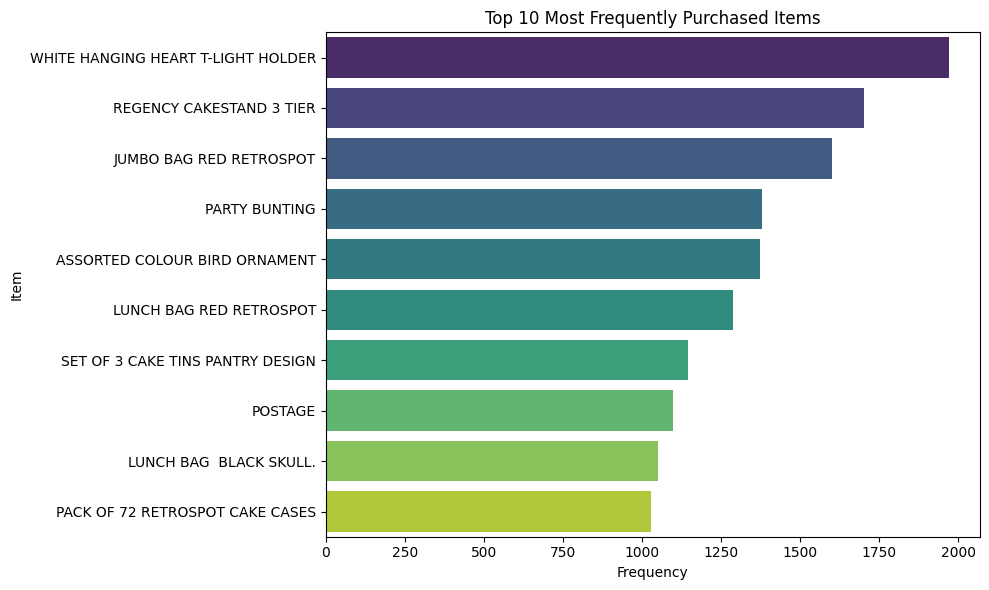

In [14]:
# Step 6: Visualization – Top 10 Most Frequently Purchased Items
item_counts = df_encoded.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")
plt.title("Top 10 Most Frequently Purchased Items")
plt.xlabel("Frequency")
plt.ylabel("Item")
plt.tight_layout()
plt.show()


/tmp/ipython-input-16-907402029.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  co_matrix.loc[item, item] = 0
/tmp/ipython-input-16-907402029.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  co_matrix.loc[item, item] = 0
/tmp/ipython-input-16-907402029.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  co_matrix.loc[item, item] = 0
/tmp/ipython-input-16-907402029.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a fu

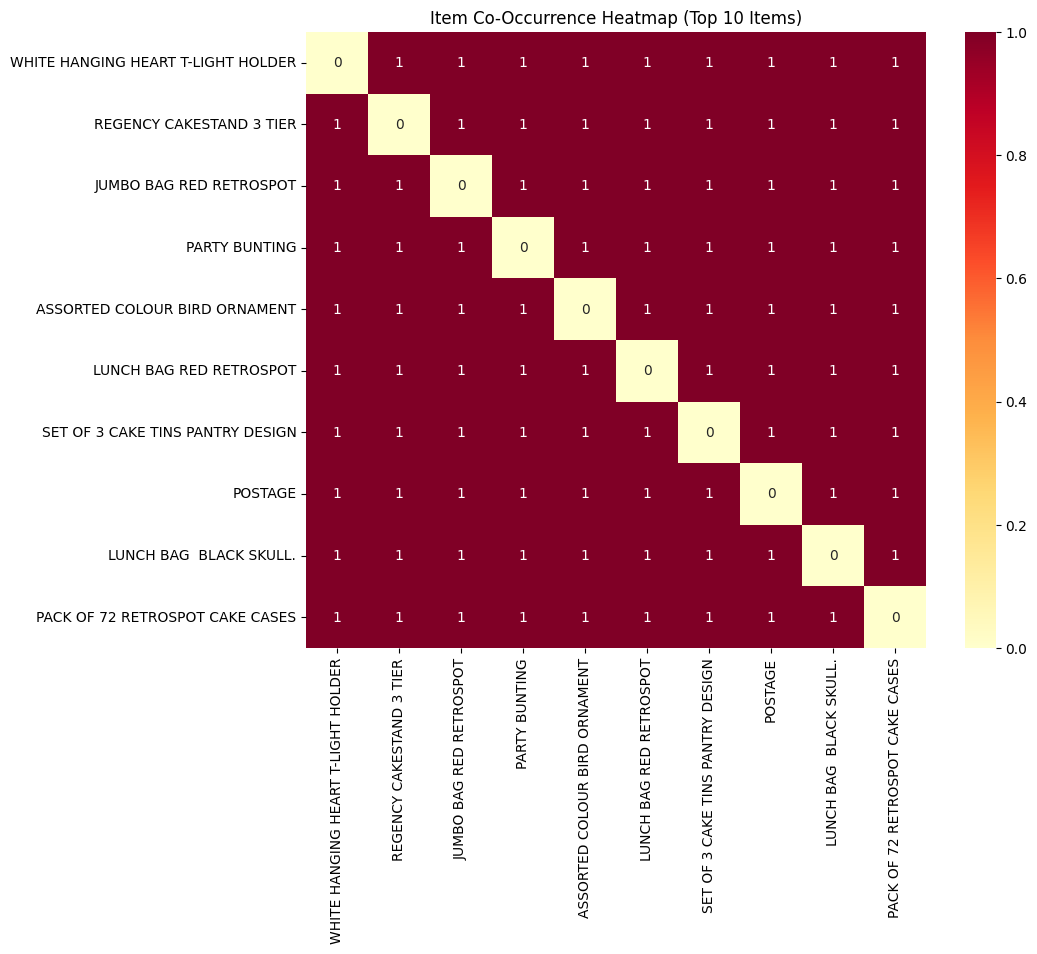

In [16]:
# Step 7: Visualization – Co-Occurrence Heatmap of Top Items
top_items = item_counts.index
co_matrix = df_encoded[top_items].T.dot(df_encoded[top_items])

# Remove self-co-occurrence
for item in top_items:
    co_matrix.loc[item, item] = 0

# Cast to int and plot
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix.astype(int), annot=True, cmap="YlOrRd", fmt="d")
plt.title("Item Co-Occurrence Heatmap (Top 10 Items)")
plt.show()


In [18]:
item_counts = df_encoded.sum().sort_values(ascending=False)
item_counts.head(30)


,0
WHITE HANGING HEART T-LIGHT HOLDER,1971
REGENCY CAKESTAND 3 TIER,1704
JUMBO BAG RED RETROSPOT,1600
PARTY BUNTING,1380
ASSORTED COLOUR BIRD ORNAMENT,1375
LUNCH BAG RED RETROSPOT,1288
SET OF 3 CAKE TINS PANTRY DESIGN,1146
POSTAGE,1099
LUNCH BAG BLACK SKULL.,1052
PACK OF 72 RETROSPOT CAKE CASES,1029


In [21]:
admin_items = ['POSTAGE', 'CARRIAGE', 'MANUAL']
df_encoded_cleaned = df_encoded.drop(columns=admin_items, errors='ignore')



Top 10 Frequent Itemsets (Apriori):
     support                              itemsets
0  0.106334  (WHITE HANGING HEART T-LIGHT HOLDER)
1  0.091929            (REGENCY CAKESTAND 3 TIER)
2  0.086319             (JUMBO BAG RED RETROSPOT)
3  0.074450                       (PARTY BUNTING)
4  0.074180       (ASSORTED COLOUR BIRD ORNAMENT)
5  0.069486             (LUNCH BAG RED RETROSPOT)
6  0.061826    (SET OF 3 CAKE TINS PANTRY DESIGN)
7  0.056754             (LUNCH BAG  BLACK SKULL.)
8  0.055514     (PACK OF 72 RETROSPOT CAKE CASES)
9  0.054111                      (SPOTTY BUNTING)

Number of itemsets found (Apriori): 242
Apriori Runtime: 10.1574 seconds


/tmp/ipython-input-28-976156347.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="support", y="itemset_str", data=frequent_itemsets_ap_sorted.head(top_n), palette="viridis")


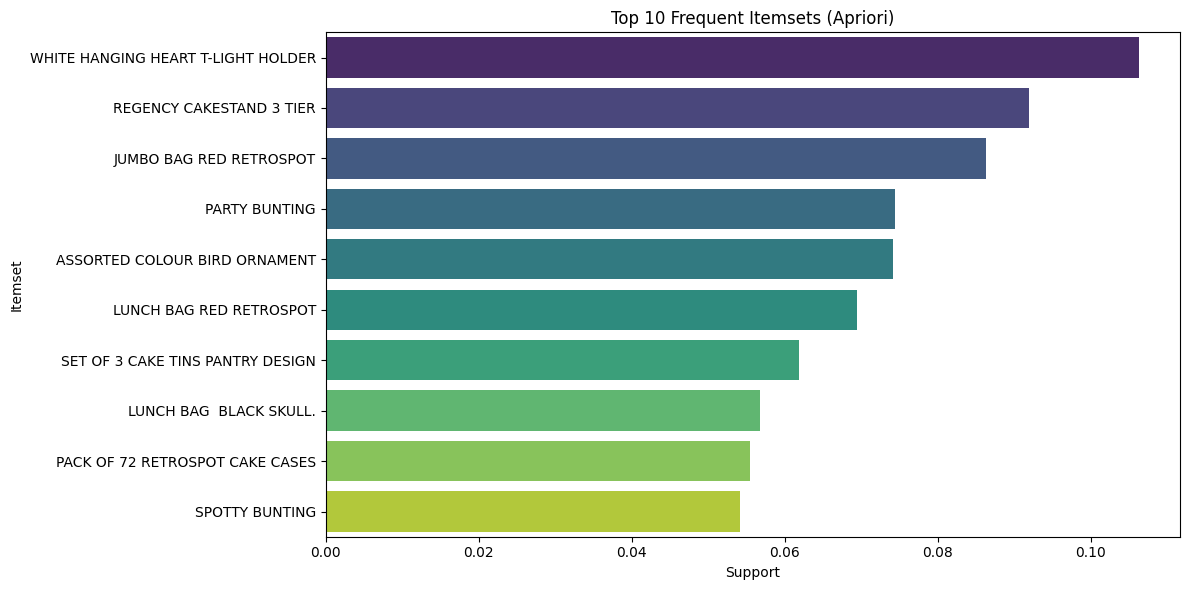

In [28]:
from mlxtend.frequent_patterns import apriori
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Step 1: Run Apriori and time it
start_time = time.time()
frequent_itemsets_ap = apriori(df_encoded_cleaned, min_support=0.02, use_colnames=True)
ap_runtime = time.time() - start_time

# Step 2: Sort and show top frequent itemsets
frequent_itemsets_ap_sorted = frequent_itemsets_ap.sort_values(by="support", ascending=False).reset_index(drop=True)
print("Top 10 Frequent Itemsets (Apriori):\n", frequent_itemsets_ap_sorted.head(10))

# Step 3: Count and print performance
print("\nNumber of itemsets found (Apriori):", len(frequent_itemsets_ap))
print(f"Apriori Runtime: {ap_runtime:.4f} seconds")

# Step 4: Barplot of top N frequent itemsets
top_n = 10
frequent_itemsets_ap_sorted["itemset_str"] = frequent_itemsets_ap_sorted["itemsets"].apply(lambda x: ', '.join(sorted(x)))
plt.figure(figsize=(12, 6))
sns.barplot(x="support", y="itemset_str", data=frequent_itemsets_ap_sorted.head(top_n), palette="viridis")
plt.title(f"Top {top_n} Frequent Itemsets (Apriori)")
plt.xlabel("Support")
plt.ylabel("Itemset")
plt.tight_layout()
plt.show()


Top 10 Frequent Itemsets (FP-Growth):
     support                              itemsets
0  0.106334  (WHITE HANGING HEART T-LIGHT HOLDER)
1  0.091929            (REGENCY CAKESTAND 3 TIER)
2  0.086319             (JUMBO BAG RED RETROSPOT)
3  0.074450                       (PARTY BUNTING)
4  0.074180       (ASSORTED COLOUR BIRD ORNAMENT)
5  0.069486             (LUNCH BAG RED RETROSPOT)
6  0.061826    (SET OF 3 CAKE TINS PANTRY DESIGN)
7  0.056754             (LUNCH BAG  BLACK SKULL.)
8  0.055514     (PACK OF 72 RETROSPOT CAKE CASES)
9  0.054111                      (SPOTTY BUNTING)

Number of itemsets found (Apriori): 242
Number of itemsets found (FP-Growth): 242
FP-Growth Runtime: 7.3902 seconds


/tmp/ipython-input-31-2429247800.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="support", y="itemset_str", data=frequent_itemsets_fp_sorted.head(top_n), palette="magma")


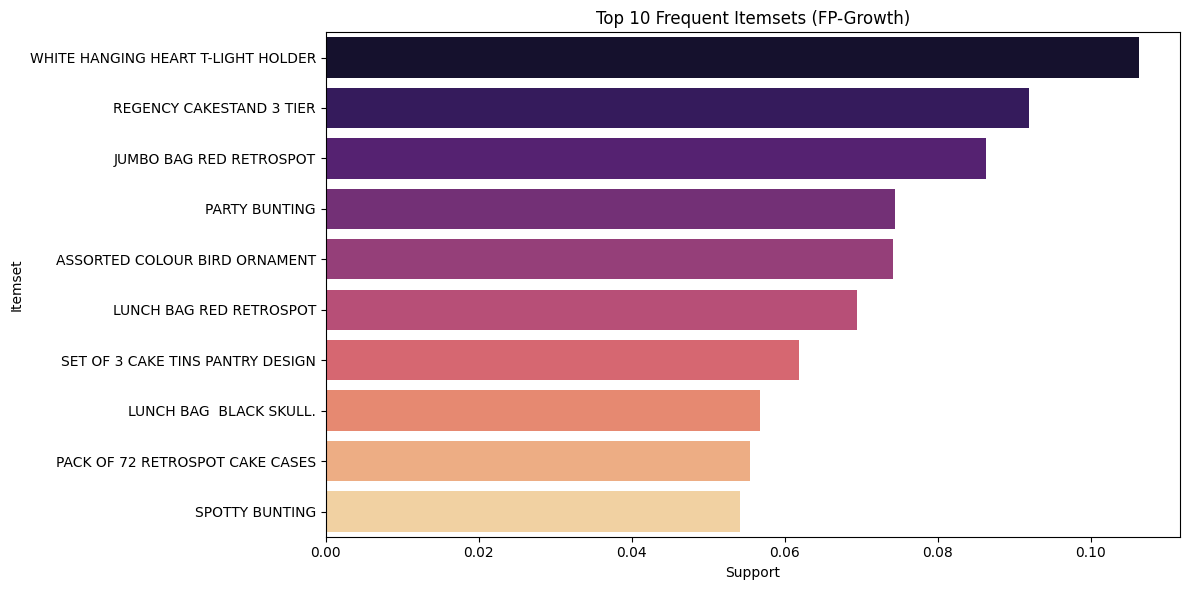

In [31]:
from mlxtend.frequent_patterns import fpgrowth

# Step 1: Run FP-Growth with same support threshold
start_time = time.time()
frequent_itemsets_fp = fpgrowth(df_encoded_cleaned, min_support=0.02, use_colnames=True)
fp_runtime = time.time() - start_time

# Step 2: Sort and show top frequent itemsets
frequent_itemsets_fp_sorted = frequent_itemsets_fp.sort_values(by="support", ascending=False).reset_index(drop=True)
print("Top 10 Frequent Itemsets (FP-Growth):\n", frequent_itemsets_fp_sorted.head(10))

# Step 3: Count and compare results
print("\nNumber of itemsets found (Apriori):", len(frequent_itemsets))
print("Number of itemsets found (FP-Growth):", len(frequent_itemsets_fp))
print(f"FP-Growth Runtime: {fp_runtime:.4f} seconds")

# Step 4: Barplot of top N frequent itemsets
top_n = 10
frequent_itemsets_fp_sorted["itemset_str"] = frequent_itemsets_fp_sorted["itemsets"].apply(lambda x: ', '.join(sorted(x)))
plt.figure(figsize=(12, 6))
sns.barplot(x="support", y="itemset_str", data=frequent_itemsets_fp_sorted.head(top_n), palette="magma")
plt.title(f"Top {top_n} Frequent Itemsets (FP-Growth)")
plt.xlabel("Support")
plt.ylabel("Itemset")
plt.tight_layout()
plt.show()


Top 10 Association Rules (from Apriori):
                           antecedents                          consequents  \
0           (ALARM CLOCK BAKELIKE RED)         (ALARM CLOCK BAKELIKE GREEN)   
1         (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED)   
2          (ALARM CLOCK BAKELIKE PINK)           (ALARM CLOCK BAKELIKE RED)   
3               (DOLLY GIRL LUNCH BOX)                 (SPACEBOY LUNCH BOX)   
4                 (SPACEBOY LUNCH BOX)               (DOLLY GIRL LUNCH BOX)   
5   (GARDENERS KNEELING PAD KEEP CALM)  (GARDENERS KNEELING PAD CUP OF TEA)   
6  (GARDENERS KNEELING PAD CUP OF TEA)   (GARDENERS KNEELING PAD KEEP CALM)   
7    (GREEN REGENCY TEACUP AND SAUCER)     (PINK REGENCY TEACUP AND SAUCER)   
8     (PINK REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
9    (GREEN REGENCY TEACUP AND SAUCER)           (REGENCY CAKESTAND 3 TIER)   

    support  confidence       lift  
0  0.028593    0.604333  14.197612  
1  0.028593    

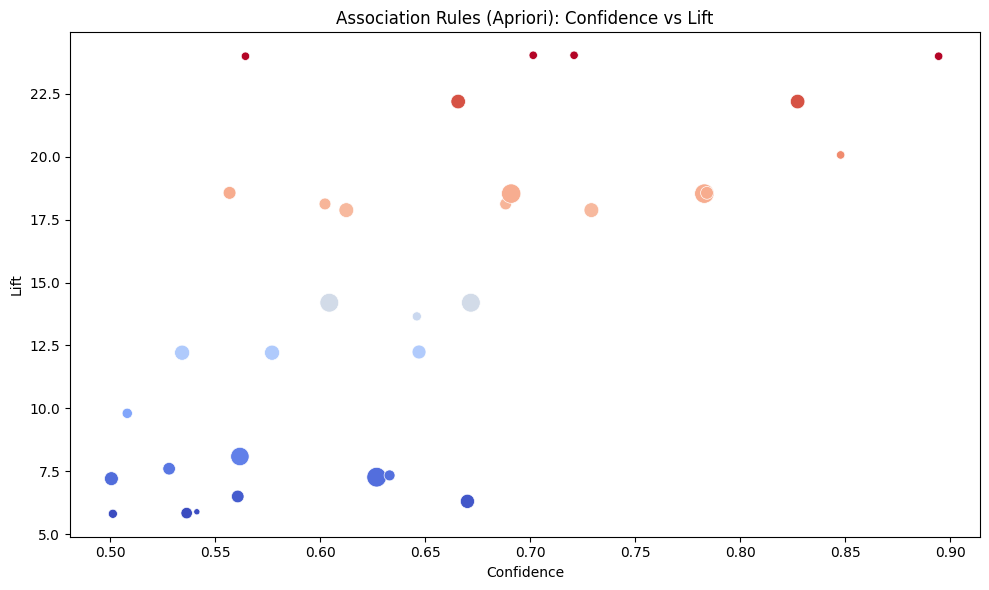

In [34]:
from mlxtend.frequent_patterns import association_rules

# Step 1: Generate association rules from Apriori itemsets
min_conf = 0.5  # You can adjust this threshold as needed
rules = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=min_conf)

# Step 2: Display top 10 rules
print("Top 10 Association Rules (from Apriori):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Step 3: Scatter plot: Confidence vs Lift
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules,
    x="confidence",
    y="lift",
    size="support",
    hue="lift",
    palette="coolwarm",
    sizes=(20, 200),
    legend=False
)
plt.title("Association Rules (Apriori): Confidence vs Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.tight_layout()
plt.show()


Top 10 Association Rules (from FP-Growth):
                           antecedents                           consequents  \
0           (ALARM CLOCK BAKELIKE RED)          (ALARM CLOCK BAKELIKE GREEN)   
1         (ALARM CLOCK BAKELIKE GREEN)            (ALARM CLOCK BAKELIKE RED)   
2          (ALARM CLOCK BAKELIKE PINK)            (ALARM CLOCK BAKELIKE RED)   
3  (WOODEN PICTURE FRAME WHITE FINISH)          (WOODEN FRAME ANTIQUE WHITE)   
4         (WOODEN FRAME ANTIQUE WHITE)   (WOODEN PICTURE FRAME WHITE FINISH)   
5   (RED HANGING HEART T-LIGHT HOLDER)  (WHITE HANGING HEART T-LIGHT HOLDER)   
6            (JUMBO BAG PINK POLKADOT)             (JUMBO BAG RED RETROSPOT)   
7             (JUMBO STORAGE BAG SUKI)             (JUMBO BAG RED RETROSPOT)   
8  (JUMBO SHOPPER VINTAGE RED PAISLEY)             (JUMBO BAG RED RETROSPOT)   
9              (HEART OF WICKER LARGE)               (HEART OF WICKER SMALL)   

    support  confidence       lift  
0  0.028593    0.604333  14.197612  
1 

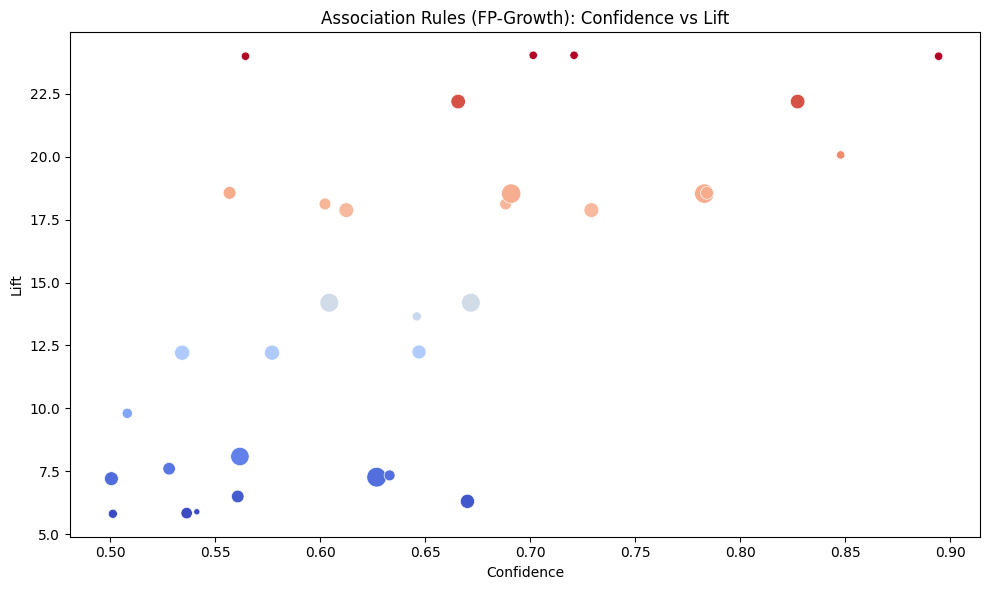

In [35]:
# Step 1: Generate association rules from FP-Growth itemsets
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=min_conf)

# Step 2: Display top 10 rules (from FP-Growth)
print("Top 10 Association Rules (from FP-Growth):")
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Step 3: Scatter plot: Confidence vs Lift (FP-Growth)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules_fp,
    x="confidence",
    y="lift",
    size="support",
    hue="lift",
    palette="coolwarm",
    sizes=(20, 200),
    legend=False
)
plt.title("Association Rules (FP-Growth): Confidence vs Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.tight_layout()
plt.show()
